<a href="https://colab.research.google.com/github/2022Gouri/Principal-Component-Analysis-PCA-on-images/blob/main/pca_on_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using PCA on images 

(194, 259, 3)


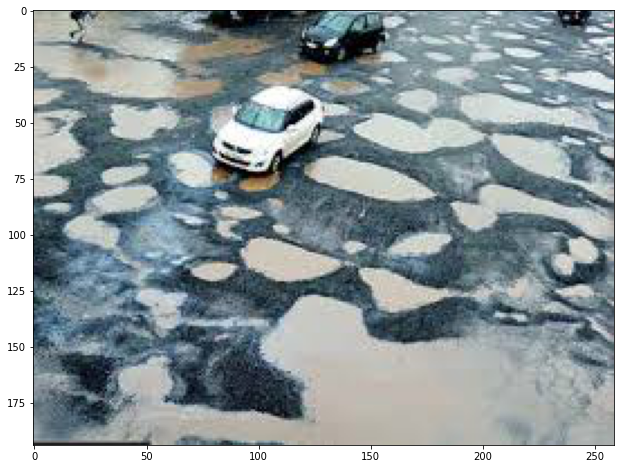

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_raw = imread("/content/roadpothole.jpg")
print(image_raw.shape)

plt.figure(figsize=[12,8])
plt.imshow(image_raw)


In [ ]:
# Show the new shape of the image
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

# Show the max value at any point.  1.0 = Black, 0.0 = White
image_bw = image_sum/image_sum.max()
print(image_bw.max())


(194, 259)
1.0


Number of components explaining 95% variance: 45


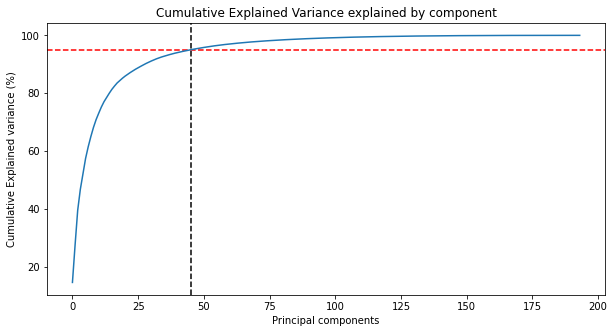

In [ ]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)


In [ ]:
len(pca.components_)


194

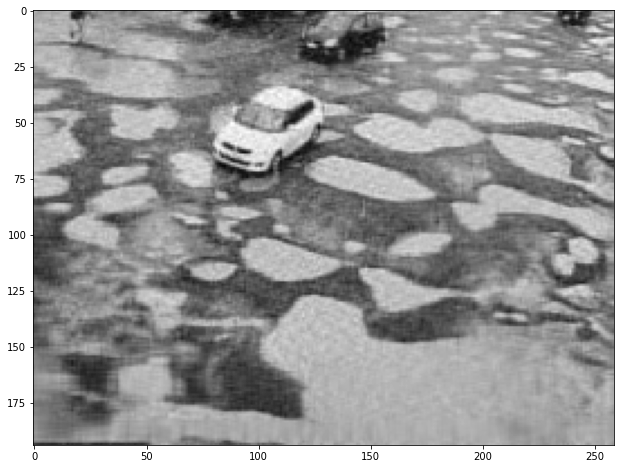

In [ ]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)


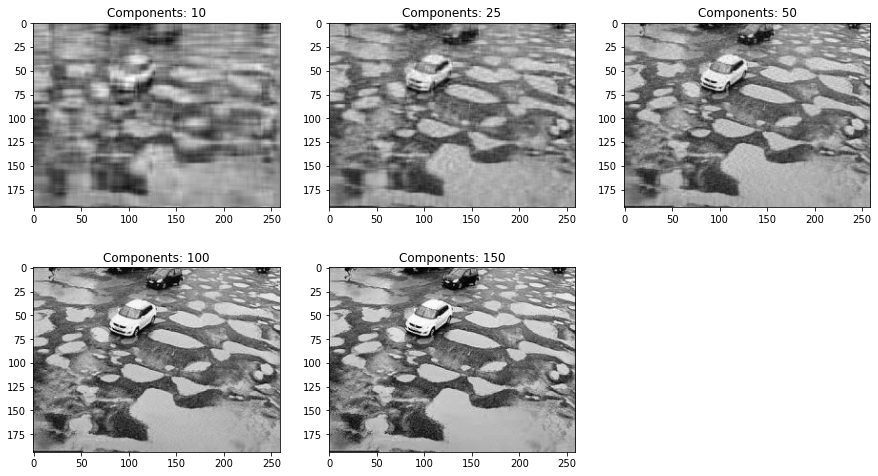

In [ ]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)

ks = [10, 25, 50, 100, 150]

plt.figure(figsize=[15,9])

for i in range(5):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()
